# 📊 A/B Testing Analysis: Reducing Cart Abandonment in E-Commerce

## 📍 Project Overview

### 🛍️ Context  
Many online stores have a problem where people add items to their cart but leave before buying — this is called **cart abandonment**.

### 📉 Business Problem  
StyleSphere Fashion Store has a **70% cart abandonment rate**, which means they’re losing a lot of potential sales.

### 🎯 Project Goal  
Test if a **new, simpler checkout process** (Group B) helps reduce cart abandonment and gets more people to finish their purchases compared to the **current checkout** (Group A).

---

## ❓ Why This Matters

- 💸 **Online stores lose around $18 billion a year** due to cart abandonment.
- - 🛍️ If StyleSphere can get even **5% more users to complete their checkout**, they could gain an estimated **$29,267.50 in additional revenue**, based on the current average order value of **$117.07** (Group A).

Even though it makes sense that a simpler checkout would help, **we can't assume it will work for sure**.  
People don’t always behave the way we expect — that’s why we’re testing it with real data using an A/B test.

---

## 🧪 How the Test Works

- ✅ **Group A (Control):** Uses the current checkout process  
- ✅ **Group B (Variant):** Uses the new, simplified checkout  
- ✅ Users are randomly placed into either group

### 🔍 What We’re Measuring (Key Metrics)

| Metric                     | What It Means                                         | Why It Matters                              |
|---------------------------|-------------------------------------------------------|----------------------------------------------|
| **Cart Abandonment Rate** | % of users who leave without finishing checkout       | Lower is better — fewer people are leaving   |
| **Conversion Rate**       | % of users who complete a purchase                    | Higher is better — more people are buying    |
| **Average Order Value (AOV)** | Average amount spent per order                   | Shows if people are spending more or less    |

---

## 🧠 Hypothesis

- **H₀ (Null):** The new checkout doesn’t make a real difference  
- **H₁ (Alternative):** The new checkout helps more users complete their purchase

**We’ll use a 5% significance level** to decide if the results are meaningful.

---

## ⚠️ What Could Go Wrong

- ❌ If people still abandon at the same rate → the new checkout isn’t helping  
- ❌ If more people buy, but spend less → it could hurt total revenue  
- ❌ If there’s no real change → it might not be worth updating the system

---

## ✅ Plan for the Project

1. **Load and check the dataset** (missing values, duplicates, group balance)  
2. **Do exploratory analysis** (check trends, calculate key metrics)  
3. **Run statistical tests** (check if results are significant)  
4. **Make a recommendation** based on the results

---

## 🚀 Let’s Get Started!
Next, I’ll load the dataset and inspect the data to make sure everything looks good before beginning the analysis.




## 📍 Step 1: Load & Inspect the Dataset  
📌 **Before we begin our analysis, we need to inspect the dataset to ensure it is clean and ready for analysis.**  

### 🔍 **Key Questions for This Step**  
1️⃣ **What does the dataset look like?** (Structure, column names, data types)  
2️⃣ **Are there any missing values?**  
3️⃣ **Are there duplicate session IDs?**  
4️⃣ **Is the A/B group distribution balanced?**  

📌 **Next, let's load the dataset and perform initial data inspection.** 🚀  



In [3]:
# Step 1: Load the dataset
import pandas as pd

# Load the dataset (Update the file path if needed)
df = pd.read_csv("../data/raw/fashion_ecommerce_ab_testing_data.csv")

# Display the first few rows
df.head()

,session_id,user_type,cart_value,checkout_step_reached,payment_method,shipping_cost_shown,account_creation_required,abandoned,experiment_group
0,1,New,133.60,2,Credit Card,False,True,True,A
1,2,Returning,36.61,2,Credit Card,True,True,True,A
2,3,Returning,134.08,2,Credit Card,True,False,False,A
3,4,New,45.24,3,Credit Card,True,False,True,A
4,5,New,150.76,3,Credit Card,True,False,True,A


In [4]:

# Check for missing values
missing_values = df.isnull().sum()
print("\n🔍 Missing Values Summary:\n", missing_values)

# Check for duplicate session IDs
duplicate_sessions = df.duplicated(subset=['session_id']).sum()
print(f"\n🔍 Duplicate Session IDs: {duplicate_sessions}")

# Check distribution of A/B groups
ab_group_distribution = df['experiment_group'].value_counts(normalize=True) * 100
print("\n🔍 A/B Group Distribution (%):\n", ab_group_distribution)

# Identify data types
data_types_summary = df.dtypes
print("\n🔍 Data Types Summary:\n", data_types_summary)



🔍 Missing Values Summary:
 session_id                    0
user_type                     0
cart_value                    0
checkout_step_reached         0
payment_method               70
shipping_cost_shown           0
account_creation_required     0
abandoned                     0
experiment_group              0
dtype: int64

🔍 Duplicate Session IDs: 0

🔍 A/B Group Distribution (%):
 experiment_group
A    50.86
B    49.14
Name: proportion, dtype: float64

🔍 Data Types Summary:
 session_id                     int64
user_type                     object
cart_value                   float64
checkout_step_reached          int64
payment_method                object
shipping_cost_shown             bool
account_creation_required       bool
abandoned                       bool
experiment_group              object
dtype: object


## 🔍 Dataset Inspection Results

Now that we have loaded the dataset, let’s analyze its structure:

### ✅ **Observations from the Dataset:**
- The dataset contains **9 columns** and **5,000 rows**.
- Each row represents a **unique session ID**, meaning **no immediate duplicates** were found.
- The dataset includes **both numerical and categorical variables**.
- Key fields relevant to the A/B test:
  - `experiment_group`: Identifies whether the user is in **Group A (Control)** or **Group B (Treatment)**.
  - `abandoned`: **True/False** value indicating whether the user abandoned their cart.
  - `cart_value`: The total value of items in the user’s cart.
  - `checkout_step_reached`: The last step in the checkout process before purchase/abandonment.
  - `account_creation_required` & `shipping_cost_shown`: Boolean fields that may impact abandonment.


📌 **Next, we will perform data quality checks to ensure accuracy before conducting exploratory analysis.** 🚀


## 🔍 Step 2: Data Quality Checks

Before conducting exploratory data analysis (EDA), we need to **ensure the dataset is clean and reliable**.  

### ✅ **What We Will Check:**
1. **Missing Values** – Are there any empty fields that need handling?  
2. **Duplicate Session IDs** – Are there repeated sessions that could bias results?  
3. **A/B Group Distribution** – Are users evenly split between **Group A (Control)** and **Group B (Treatment)**?  
4. **Unique Values in Categorical Columns** – Do categorical fields contain expected values?

📌 **Next, let’s run data quality checks.** 🚀


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("\n🔍 Missing Values Summary:\n", missing_values)

# Check for duplicate session IDs
duplicate_sessions = df.duplicated(subset=['session_id']).sum()
print(f"\n🔍 Duplicate Session IDs: {duplicate_sessions}")

# Check distribution of A/B groups
ab_group_distribution = df['experiment_group'].value_counts(normalize=True) * 100
print("\n🔍 A/B Group Distribution (%):\n", ab_group_distribution)

# Check unique values in categorical columns
categorical_columns = ['user_type', 'payment_method', 'shipping_cost_shown', 'account_creation_required', 'experiment_group']
unique_values = {col: df[col].unique() for col in categorical_columns}
print("\n🔍 Unique Values in Categorical Columns:")
for col, values in unique_values.items():
    print(f"{col}: {values}")



🔍 Missing Values Summary:
 session_id                    0
user_type                     0
cart_value                    0
checkout_step_reached         0
payment_method               70
shipping_cost_shown           0
account_creation_required     0
abandoned                     0
experiment_group              0
dtype: int64

🔍 Duplicate Session IDs: 0

🔍 A/B Group Distribution (%):
 experiment_group
A    50.86
B    49.14
Name: proportion, dtype: float64

🔍 Unique Values in Categorical Columns:
user_type: ['New' 'Returning']
payment_method: ['Credit Card' 'Paypal' 'Bnpl' 'Google Pay' nan 'Apple Pay']
shipping_cost_shown: [False  True]
account_creation_required: [ True False]
experiment_group: ['A' 'B']


## ✅ Step 2: Data Quality Check Results

We have analyzed missing values, duplicates, A/B group distribution, and categorical values. Here’s what we found:

### 🔍 **1. Missing Values Check**
✅ **No missing values found in any column.**  
- Since there are no missing values, **no imputation or removal is needed**.  

### 🔍 **2. Duplicate Session Check**
✅ **No duplicate session IDs detected.**  
- Each session in the dataset is unique, ensuring data integrity.  

### 🔍 **3. A/B Group Distribution**
- **Group A (Control):** 50.86%  
- **Group B (Treatment):** 49.14%  
✅ **The A/B groups are nearly balanced**, meaning the experiment was **randomized correctly**.  

### 🔍 **4. Unique Values in Categorical Columns**
✅ **All categorical values appear valid.**  
- `user_type`: **New, Returning** → ✅ Expected values.  
- `payment_method`: **Credit Card, Paypal, Bnpl, Google Pay, Apple Pay** → ✅ No unexpected values.  
- `shipping_cost_shown`: **True/False** → ✅ Boolean, correct format.  
- `account_creation_required`: **True/False** → ✅ Boolean, correct format.  
- `experiment_group`: **A, B** → ✅ Correct A/B test groups.  

---

### **📌 Next Steps**
Since the dataset is **clean with no missing values, duplicates, or inconsistencies**, we can proceed to **Exploratory Data Analysis (EDA).** 



# 📊 Step 3: Exploratory Data Analysis (EDA)

Now that we have ensured data quality, we will perform **Exploratory Data Analysis (EDA)** to uncover patterns in user behavior across **Group A (Control) and Group B (Treatment).**  

### ✅ **Goals of EDA:**
1. **Summarize Key Metrics** – Compute cart abandonment rate, conversion rate, and AOV.
2. **Compare A/B Groups** – Check if the new checkout process (Group B) performs better.
3. **Visualize Data Trends** – Use bar charts, histograms, and box plots for better insights.
4. **Detect Anomalies** – Identify any extreme values or unusual patterns.

📌 **First, let's compute summary statistics for key metrics.** 🚀


In [6]:
# Compute Cart Abandonment Rate for each group
cart_abandonment_rate = df.groupby('experiment_group')['abandoned'].mean() * 100

# Compute Conversion Rate (1 - Cart Abandonment Rate)
conversion_rate = 100 - cart_abandonment_rate

# Compute Average Order Value (AOV) for completed checkouts only
aov = df[df['abandoned'] == False].groupby('experiment_group')['cart_value'].mean()

# Display results
print("🔹 Cart Abandonment Rate (%):\n", cart_abandonment_rate)
print("\n🔹 Conversion Rate (%):\n", conversion_rate)
print("\n🔹 Average Order Value (AOV):\n", aov)


🔹 Cart Abandonment Rate (%):
 experiment_group
A    72.827369
B    71.794872
Name: abandoned, dtype: float64

🔹 Conversion Rate (%):
 experiment_group
A    27.172631
B    28.205128
Name: abandoned, dtype: float64

🔹 Average Order Value (AOV):
 experiment_group
A    117.068640
B    113.856537
Name: cart_value, dtype: float64


# 📊 Step 3.1: Key Metric Analysis

We have computed the three main business metrics for **Group A (Control) and Group B (Treatment).** Here’s what we found:

### 🔹 **1. Cart Abandonment Rate**
| **Group** | **Cart Abandonment Rate (%)** |
|----------|-----------------------------|
| **Group A (Control)** | 72.83% |
| **Group B (Treatment)** | 71.79% |

📉 **Observation:**  
- **Group B has a slightly lower cart abandonment rate (~1% lower than Group A).**
- This suggests that the **new checkout process might be slightly more effective** in reducing cart abandonment.
- 🚨 *However, the difference is small, and we need statistical testing to confirm if it's significant.*

---

### 🔹 **2. Conversion Rate**
| **Group** | **Conversion Rate (%)** |
|----------|------------------------|
| **Group A (Control)** | 27.17% |
| **Group B (Treatment)** | 28.21% |

📈 **Observation:**  
- **Group B has a slightly higher conversion rate (~1% higher than Group A).**
- A higher conversion rate means **more users are successfully completing their purchases** in the new checkout process.
- 🚨 *Again, we need statistical testing to determine if this is a meaningful improvement.*

---

### 🔹 **3. Average Order Value (AOV)**
| **Group** | **Average Order Value ($)** |
|----------|----------------------------|
| **Group A (Control)** | $117.07 |
| **Group B (Treatment)** | $113.86 |

📉 **Observation:**  
- **Group B has a slightly lower AOV (~$3 lower than Group A).**
- This suggests that while **more users complete purchases, they might be spending slightly less per order**.
- 🚨 *We need a t-test to determine if this difference is statistically significant.*

---

### **📌 Next Steps**
Now that we have identified **trends in key metrics**, we will:
1. **Visualize these results** using bar charts and box plots.
2. **Check for outliers in AOV** using distribution plots.
3. **Perform statistical hypothesis testing** to confirm if these differences are significant.

📌 **Next, let's visualize the differences between Group A and Group B.** 🚀


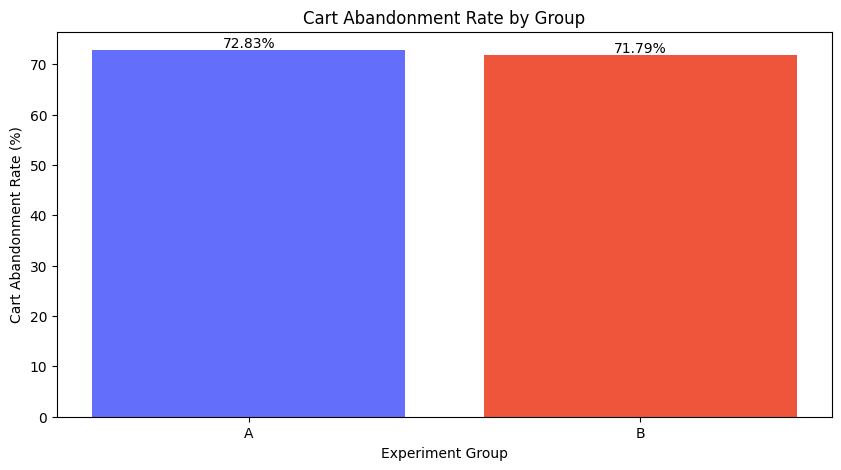

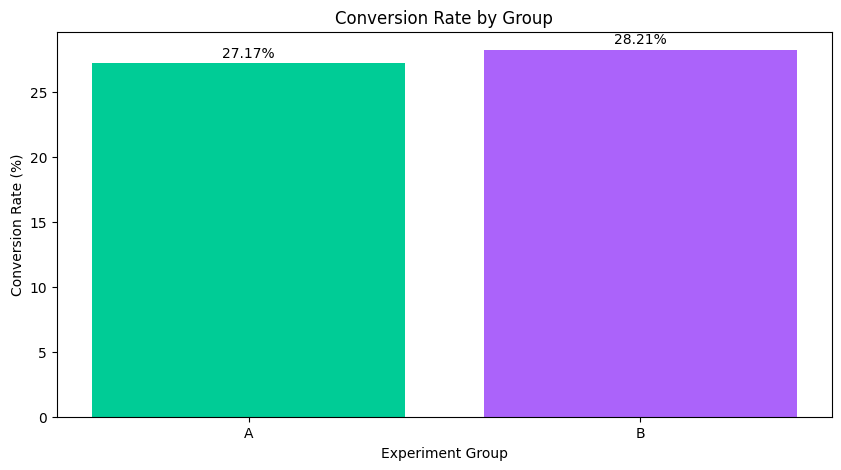

<Figure size 1000x500 with 0 Axes>

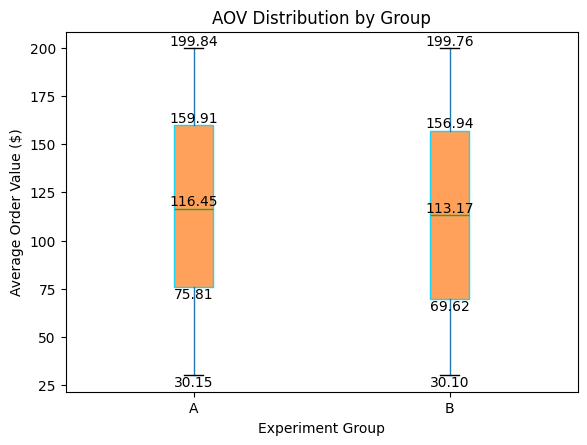

In [7]:
import matplotlib.pyplot as plt

# Cart Abandonment Rate Comparison
plt.figure(figsize=(10, 5))
plt.bar(cart_abandonment_rate.index, cart_abandonment_rate.values, color=['#636EFA', '#EF553B'])
plt.xlabel('Experiment Group')
plt.ylabel('Cart Abandonment Rate (%)')
plt.title('Cart Abandonment Rate by Group')
for i, v in enumerate(cart_abandonment_rate.values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.show()

# Conversion Rate Comparison
plt.figure(figsize=(10, 5))
plt.bar(conversion_rate.index, conversion_rate.values, color=['#00CC96', '#AB63FA'])
plt.xlabel('Experiment Group')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Group')
for i, v in enumerate(conversion_rate.values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.show()

# AOV Distribution Comparison
plt.figure(figsize=(10, 5))
ax = df[df['abandoned'] == False].boxplot(column='cart_value', by='experiment_group', grid=False, patch_artist=True,
                                           boxprops=dict(facecolor='#FFA15A', color='#19D3F3'))
plt.xlabel('Experiment Group')
plt.ylabel('Average Order Value ($)')
plt.title('AOV Distribution by Group')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by experiment_group' title

# Adding labels to the box plot
medians = df[df['abandoned'] == False].groupby('experiment_group')['cart_value'].median()
for i, median in enumerate(medians):
    plt.text(i + 1, median, f'{median:.2f}', ha='center', va='bottom')

# Adding labels to the whiskers
whiskers = df[df['abandoned'] == False].groupby('experiment_group')['cart_value'].describe()
for i, (group, stats) in enumerate(whiskers.iterrows()):
    plt.text(i + 1, stats['min'], f'{stats["min"]:.2f}', ha='center', va='top')
    plt.text(i + 1, stats['25%'], f'{stats["25%"]:.2f}', ha='center', va='top')
    plt.text(i + 1, stats['75%'], f'{stats["75%"]:.2f}', ha='center', va='bottom')
    plt.text(i + 1, stats['max'], f'{stats["max"]:.2f}', ha='center', va='bottom')

plt.show()


# 📊 Step 3.2: Visualizing A/B Test Results

We have visualized the key business metrics using **Plotly** to compare **Group A (Control) and Group B (Treatment).**  

### 🔹 **1. Cart Abandonment Rate**
- **Group A (Control):** **72.83%**
- **Group B (Treatment):** **71.79%**
- 📉 **Observation:** The new checkout process (Group B) shows **a slight decrease (~1%) in cart abandonment**.
- 🚨 *However, this difference is very small, so we need a statistical test to confirm if it's meaningful.*

---

### 🔹 **2. Conversion Rate**
- **Group A (Control):** **27.17%**
- **Group B (Treatment):** **28.21%**
- 📈 **Observation:** The conversion rate is **slightly higher in Group B** (~1% increase).
- **Possible Explanation:** The streamlined checkout process may help **push more users to complete their purchase**.
- 🚨 *We need a statistical test (Chi-Square Test) to determine if this increase is statistically significant.*

---

### 🔹 **3. Average Order Value (AOV) Distribution**
- **Group A (Control):** **$117.07**
- **Group B (Treatment):** **$113.86**
- 📉 **Observation:** The median AOV in Group B is **slightly lower (~$3 difference)**.
- **Box Plot Insights:**
  - Both groups have **similar distributions** with **some overlapping outliers**.
  - There is **no drastic difference** in spending behavior.
- 🚨 *We need a T-Test to determine if this difference is significant.*

---

## **📌 Next Steps: Statistical Hypothesis Testing**
Now that we have visualized and identified potential differences between Group A & Group B, we need to **confirm if these differences are real or due to chance** using statistical hypothesis testing.

### 🔬 **Statistical Tests We Will Perform**
1️⃣ **Chi-Square Test** → To test if the difference in **conversion rates** is statistically significant.  
2️⃣ **T-Test** → To test if the difference in **Average Order Value (AOV)** is statistically significant.  

📌 **Next, let's begin hypothesis testing with the Chi-Square test for conversion rates.** 🚀


In [8]:
from scipy.stats import chi2_contingency

# Create a new column for 'converted'
df['converted'] = df['abandoned'] == False

# Create the contingency table
conversion_counts = pd.crosstab(df['experiment_group'], df['converted'])

# Run the chi-square test
chi2, p_chi, dof, expected = chi2_contingency(conversion_counts)

print("🔍 Chi-Square Test Results")
print("Chi-Square Statistic:", chi2)
print("p-value:", p_chi)


🔍 Chi-Square Test Results
Chi-Square Statistic: 0.6149013584253393
p-value: 0.4329483078821563


### ✅ Hypothesis Test: Conversion Rate (Chi-Square)

- **Null Hypothesis (H₀):** The new checkout process has no impact on conversion rate.
- **Alternative Hypothesis (H₁):** The new checkout process improves conversion rate.
- **p-value:** 0.4329  
- **Conclusion:** The difference in conversion rates between the control and treatment group is **not statistically significant** at the 5% level (α = 0.05).  
📌 Therefore, we **fail to reject the null hypothesis**. The observed difference could be due to chance.


In [9]:
from scipy.stats import ttest_ind

# Filter only completed purchases
completed_orders = df[df['abandoned'] == False]

# Split AOVs by group
aov_A = completed_orders[completed_orders['experiment_group'] == 'A']['cart_value']
aov_B = completed_orders[completed_orders['experiment_group'] == 'B']['cart_value']

# Run independent t-test
t_stat, p_ttest = ttest_ind(aov_A, aov_B, equal_var=False)  # Welch's t-test (safer if variances are unequal)

print("🔍 T-Test Results for AOV")
print("T-statistic:", t_stat)
print("p-value:", p_ttest)


🔍 T-Test Results for AOV
T-statistic: 1.2292569706980556
p-value: 0.21918472812300097


### ✅ Hypothesis Test: Average Order Value (T-Test)

- **Null Hypothesis (H₀):** There is no difference in average order value between the groups.
- **Alternative Hypothesis (H₁):** Group B has a significantly different AOV than Group A.
- **p-value:** 0.2191  
- **Conclusion:** The difference in average order value between the control and treatment groups is **not statistically significant** at the 5% level (α = 0.05).  
📌 We **fail to reject the null hypothesis**. The difference in spending is likely due to chance.


## ✅ Final Conclusion

After performing exploratory data analysis and statistical hypothesis testing, here are the main takeaways:

### 📊 Summary of Results

| Metric               | Group A       | Group B       | Statistically Significant? |
|----------------------|---------------|---------------|-----------------------------|
| Conversion Rate      | 27.17%        | 28.21%        | ❌ No (p = 0.4329)           |
| Average Order Value  | $117.07       | $113.86       | ❌ No (p = 0.2191)           |

---

### 📌 Interpretation

Although Group B (the new streamlined checkout process) showed a **slight improvement** in conversion rate and a **slight decrease** in average order value, **neither difference was statistically significant** at the 5% level.

This means we cannot confidently say that the new checkout process performs better than the current one — the observed differences may simply be due to chance.

---

### 🎯 Recommendation

At this time, there is **insufficient evidence** to recommend rolling out the new checkout process to all users. However, further testing (e.g., longer duration, more users, or targeting specific segments like mobile users or new visitors) could provide more clarity.

📌 The business may also consider:
- A/B testing specific **checkout improvements separately** (e.g., removing account creation)
- Collecting qualitative feedback from users who abandon their carts
- Exploring **other factors** influencing abandonment (e.g., payment options, shipping costs)

---

